# Causal realtionship between Climate and Macro data
##### Check for correlations on both EU and country-specific level


#### Package import 

In [294]:
library(dplyr)
library(tidyverse)
library(ggplot2)
library(corrplot)

#### Data import

In [295]:
data <- arrow::read_csv_arrow("s3://ecb-hackathon-data-group07-x19s00/processed_data/final_dataset.csv")
print(colnames(data))

  [1] "NUTS_ID"             "YEAR"                "spi01_min"          
  [4] "spi03_min"           "spi06_min"           "spi12_min"          
  [7] "lfi_min"             "tmax_min"            "fapar_min"          
 [10] "sma_min"             "spi01_mean"          "spi03_mean"         
 [13] "spi06_mean"          "spi12_mean"          "lfi_mean"           
 [16] "tmax_mean"           "fapar_mean"          "sma_mean"           
 [19] "spi01_median"        "spi03_median"        "spi06_median"       
 [22] "spi12_median"        "lfi_median"          "tmax_median"        
 [25] "fapar_median"        "sma_median"          "spi01_max"          
 [28] "spi03_max"           "spi06_max"           "spi12_max"          
 [31] "lfi_max"             "tmax_max"            "fapar_max"          
 [34] "sma_max"             "drg_agr_w"           "drg_agr_s"          
 [37] "drg_man_w"           "drg_man_s"           "drg_agr_w_01"       
 [40] "drg_agr_w_02"        "drg_agr_w_03"        "drg_agr_w_04"

### Functions

In [313]:
economic_chart <- function(data, region, sector){
    
  
  gva <- ifelse(sector=="A", 'gva_employ_A', 'gva_employ_C')
  
  drought_indicator <- ifelse(sector=="A", 'drg_agr_w', 'drg_man_w')
  hwe_indicator <- 'yearly_hw'
    
  data <- data %>% filter(NUTS_ID == region) 
  coef <- 1.33*max(data[[drought_indicator]], na.rm=TRUE) 
    
  chart <- ggplot(data, aes(x=YEAR)) +
                   geom_line(aes(y = !!as.name(gva)/coef, color = gva), lwd=2) +
                   geom_line(aes(y = !!as.name(drought_indicator), color = drought_indicator), lwd=2) +
                   geom_line(aes(y = !!as.name(hwe_indicator)/coef, color = hwe_indicator), lwd = 2) +
    
  scale_colour_manual("", 
                      breaks = c(gva, drought_indicator, hwe_indicator),
                      values = c("darkblue", "cyan3", "brown1")) +

 scale_y_continuous(
    name = indicator,
    sec.axis = sec_axis(~.*coef, name = 'GVA / employment')
  ) +
 theme_minimal() + 
        theme(legend.position = 'bottom', 
              axis.title.x = element_blank(),
              panel.grid.minor = element_blank())+
        guides(color=guide_legend(ncol=8)) 
 
 return(chart)
}

### Regional Visualisations

##### Albacete, Spain

Warning message:
“Removed 2 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 7 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 7 rows containing missing values (`geom_line()`).”


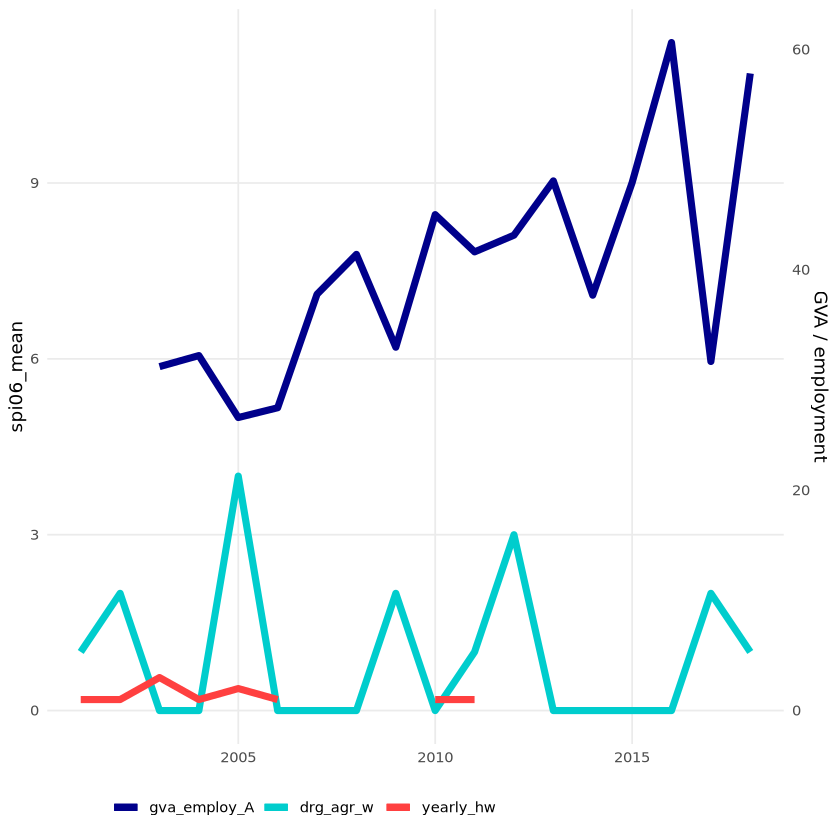

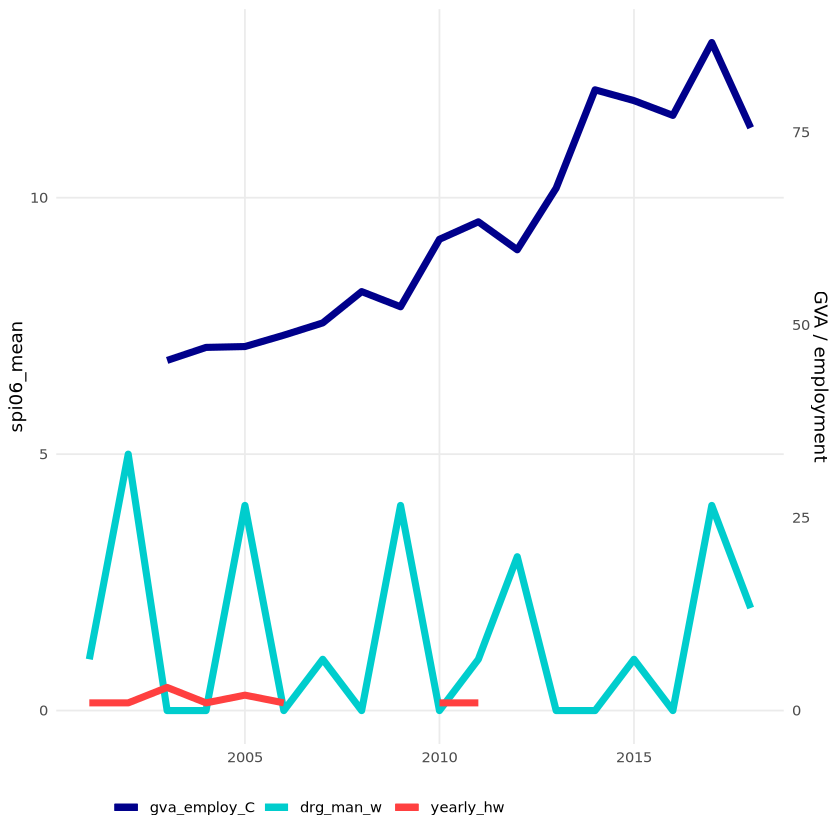

In [314]:
region <- 'ES418'
economic_chart(data, region, "A")
economic_chart(data, region, "C")

##### Larissa, Greece

Warning message:
“Removed 2 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 1 row containing missing values (`geom_line()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 1 row containing missing values (`geom_line()`).”


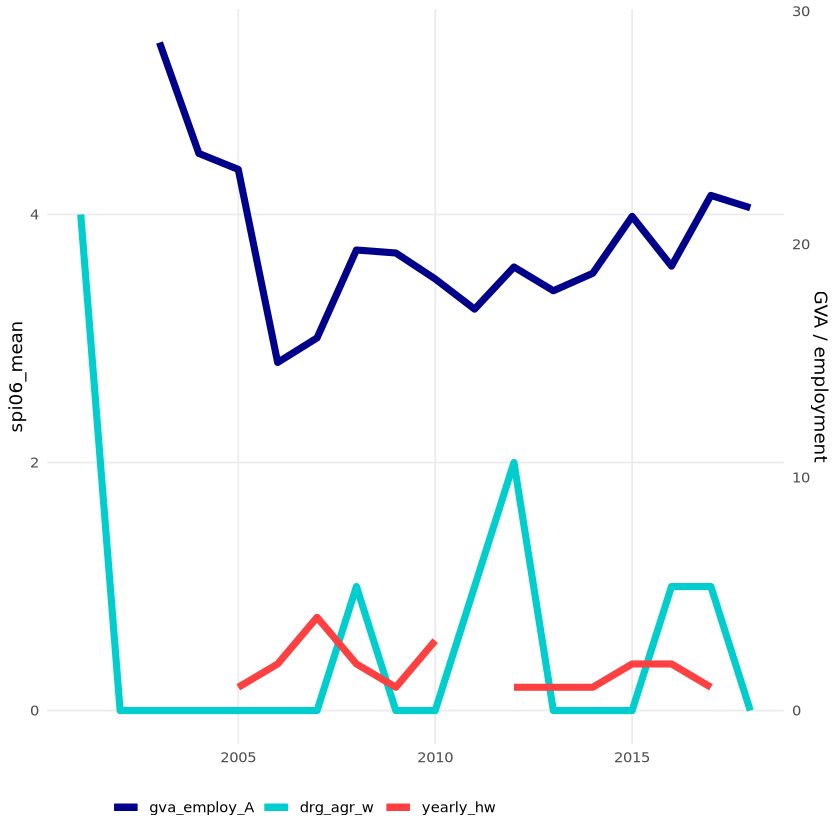

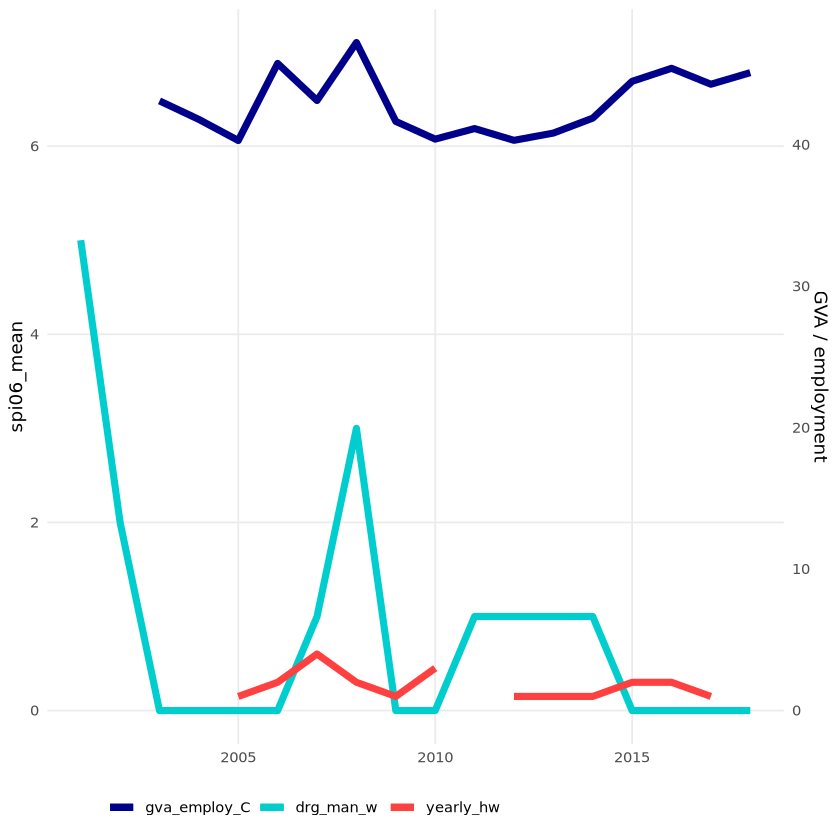

In [316]:
region <- 'EL612'
economic_chart(data, region, "A")
economic_chart(data, region, "C")

##### Rossiori, Romania

Warning message:
“Removed 2 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 5 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 5 rows containing missing values (`geom_line()`).”


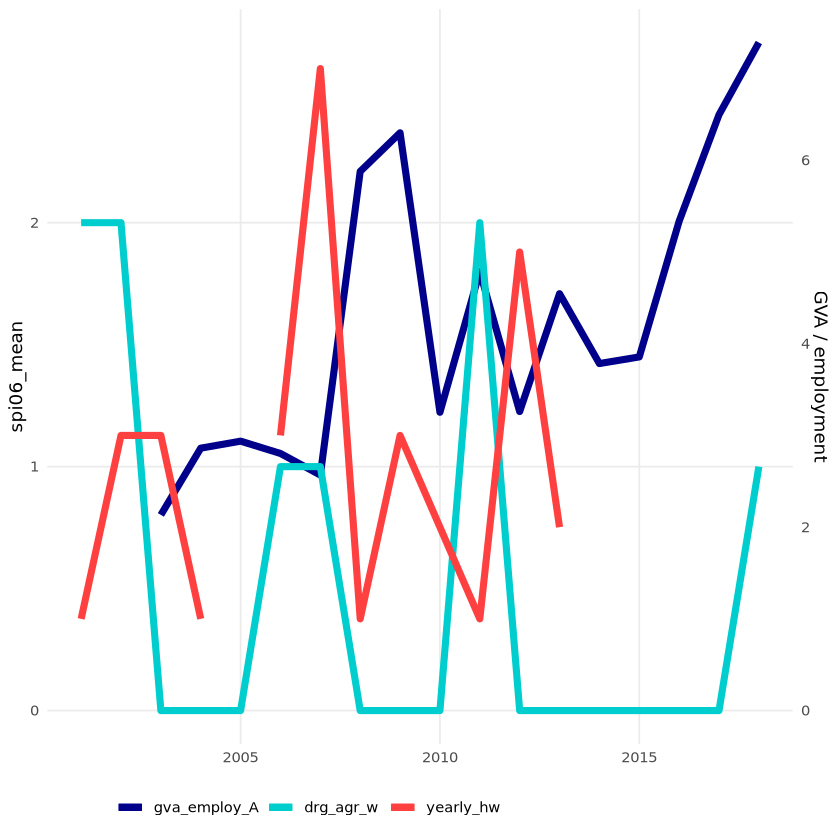

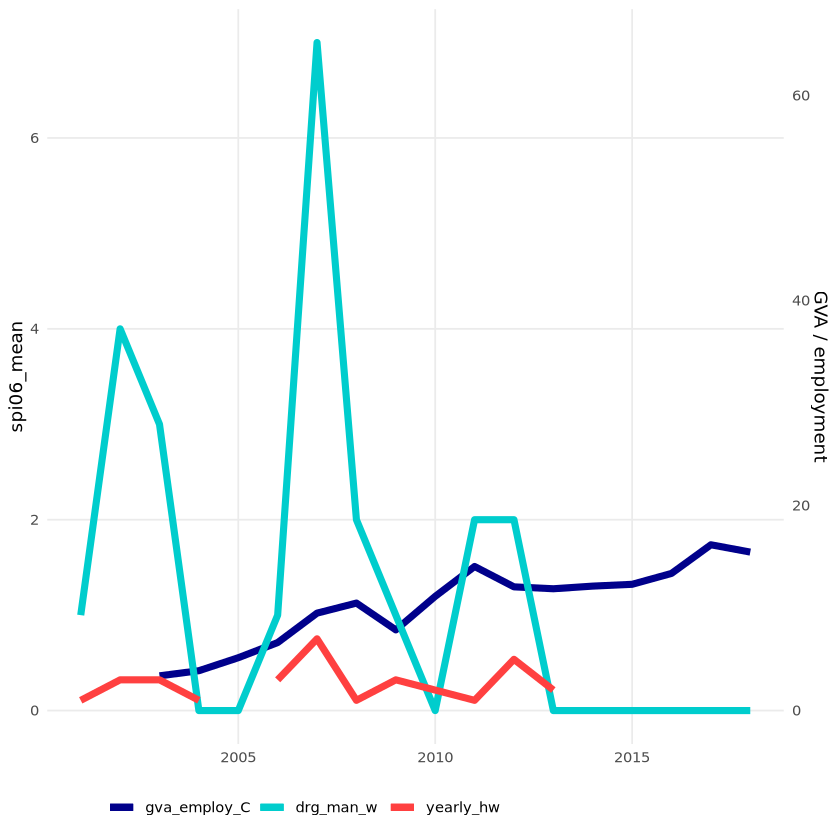

In [317]:
region <- 'RO221'
economic_chart(data, region, "A")
economic_chart(data, region, "C")

##### Ciampino, Italy

Warning message:
“Removed 2 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_line()`).”


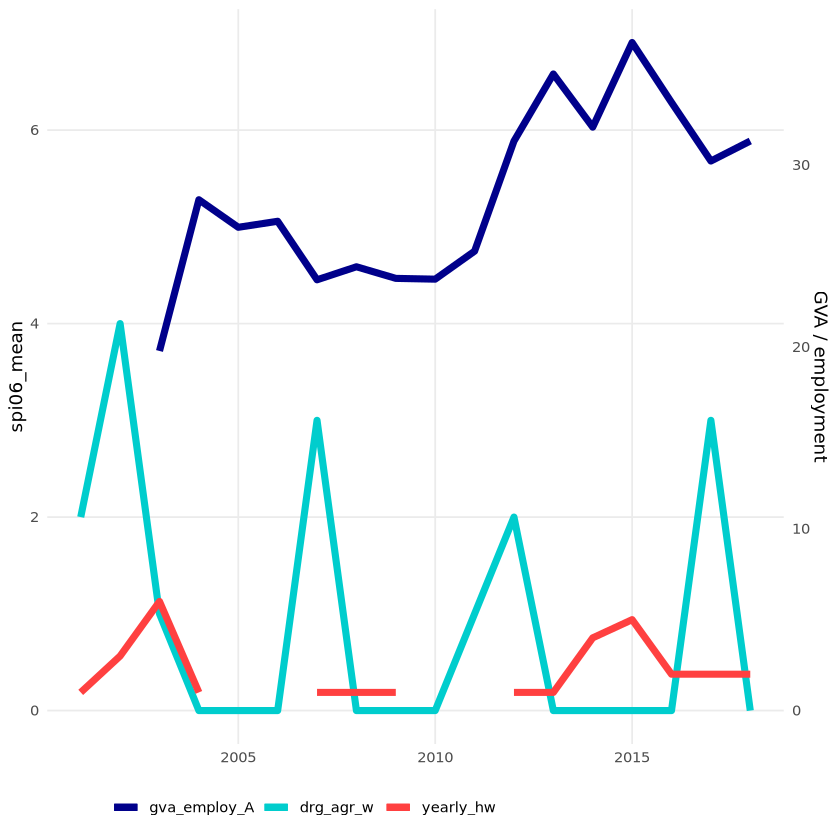

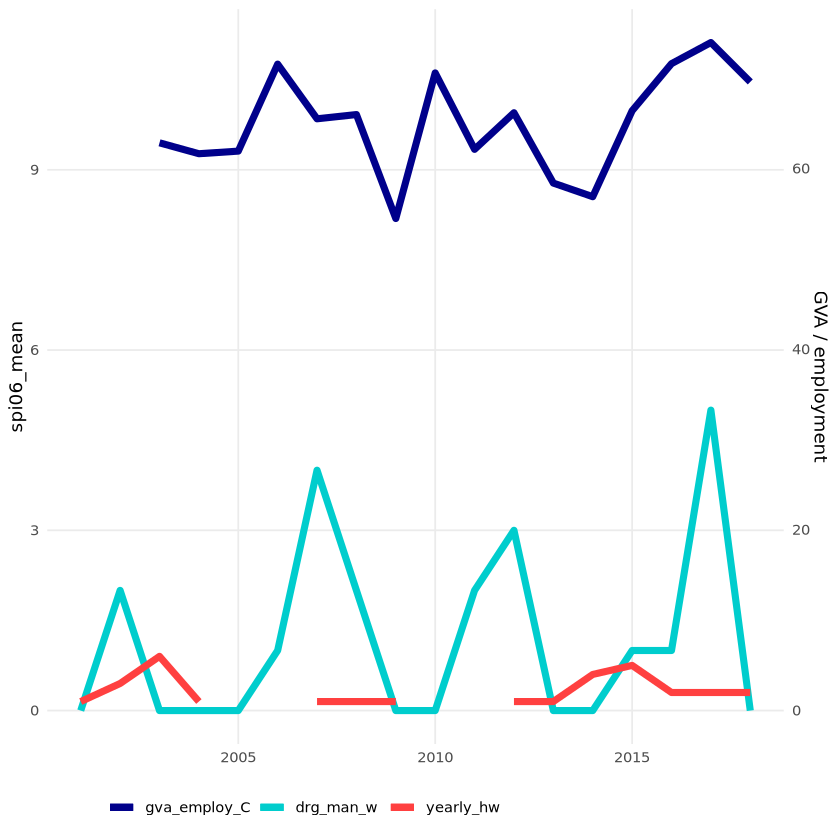

In [318]:
region <- 'ITI43'
economic_chart(data, region, "A")
economic_chart(data, region, "C")

##### Trier-Saarburg, Germany

Warning message:
“Removed 2 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_line()`).”


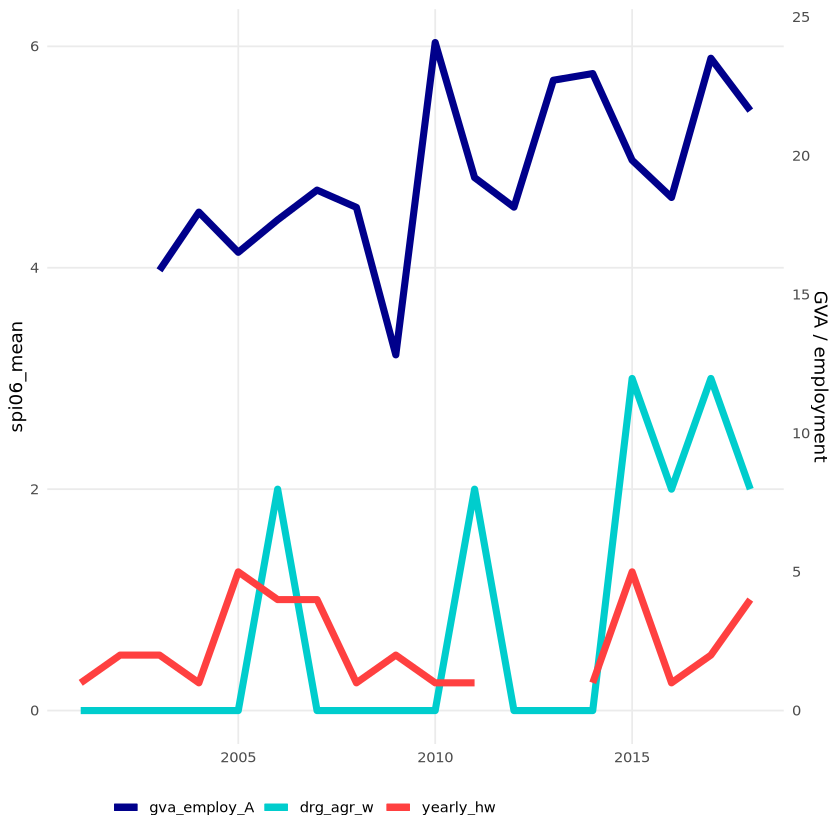

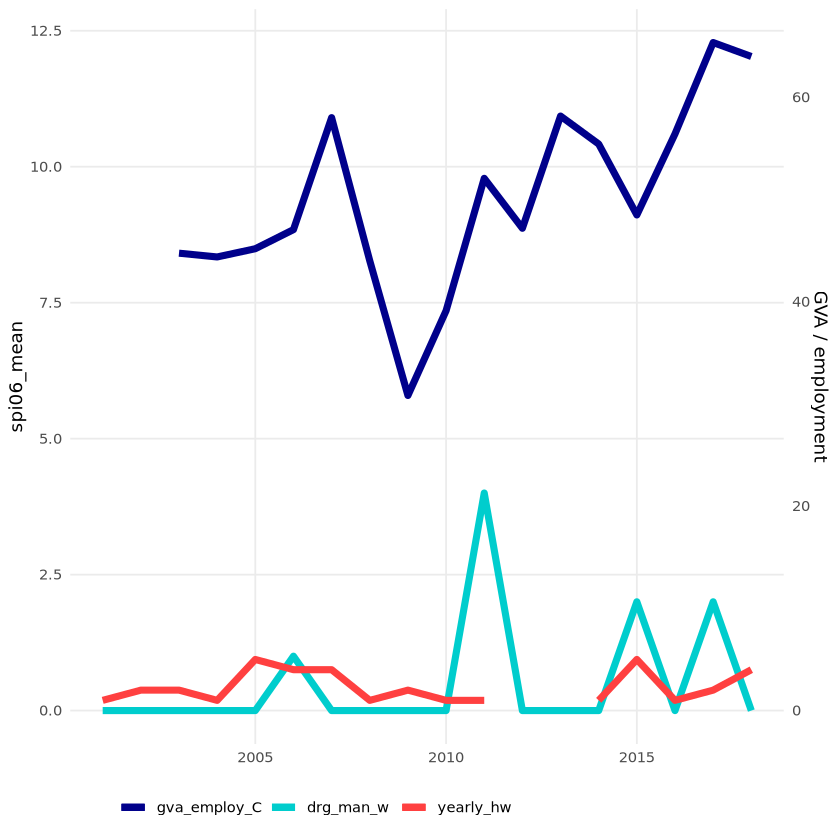

In [322]:
region <- 'DEB25'
economic_chart(data, region, "A")
economic_chart(data, region, "C")

In [323]:
bubble_data <- data %>% filter(YEAR==2010) %>% dplyr::select(c(NUTS_ID, avg_hw_intensity, spi06))

ERROR: [1m[33mError[39m in `dplyr::select()`:[22m
[33m![39m Can't subset columns that don't exist.
[31m✖[39m Column `spi06` doesn't exist.
